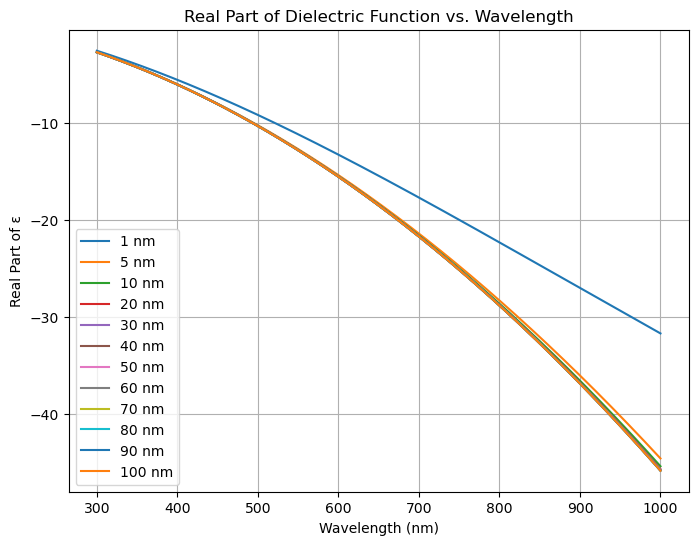

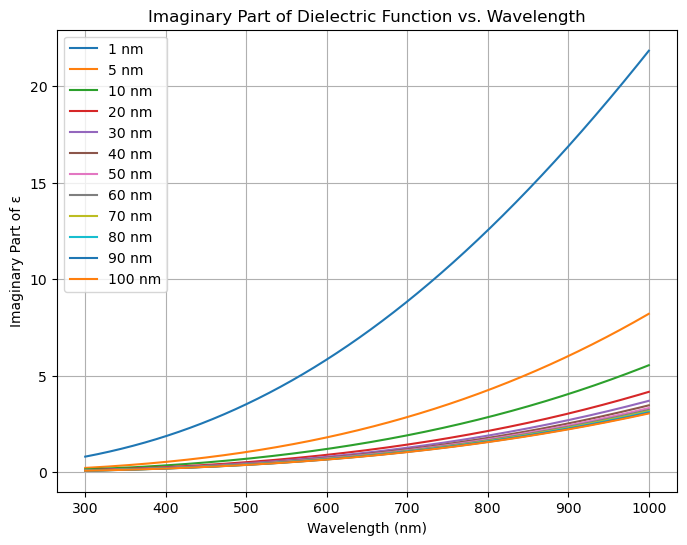

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and parameters
c = 3e8                         # speed of light, m/s
epsilon_inf = 1.53              # high-frequency dielectric constant for Au
omega_p = 13e15                 # plasma frequency, Hz
gamma_bulk = 1.1e14             # bulk damping constant, Hz
v_f = 1.41e6                    # Fermi velocity, m/s (converted from 14.1e14 nm/s)
C = 0.8                         # scattering constant

# Nanoparticle radii (in nm) and conversion to m
radii_nm = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
radii = [r * 1e-9 for r in radii_nm]

# Define wavelength range (300 nm to 1000 nm) and convert to m
wavelength_nm = np.linspace(300, 1000, 1000)
wavelength = wavelength_nm * 1e-9

# Convert wavelength to angular frequency: ω = 2πc/λ
omega = 2 * np.pi * c / wavelength

def drude_dielectric(omega, omega_p, gamma, epsilon_inf):
    """
    Computes the complex dielectric function using the Drude model:
      ε(ω) = ε_inf - ω_p^2/(ω^2 + iωγ)
    """
    return epsilon_inf - omega_p**2 / (omega**2 + 1j * omega * gamma)

# Compute dielectric function for nanoparticles with size-dependent damping
epsilon_np = {}
for r in radii:
    # Effective damping: bulk damping plus additional term from surface scattering
    gamma_eff = gamma_bulk + C * v_f / r
    epsilon_np[r] = drude_dielectric(omega, omega_p, gamma_eff, epsilon_inf)

# Plot the real parts
plt.figure(figsize=(8, 6))
for r in radii:
    plt.plot(wavelength_nm, np.real(epsilon_np[r]), label=f'{int(r*1e9)} nm')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Real Part of ε')
plt.title('Real Part of Dielectric Function vs. Wavelength')
plt.legend()
plt.grid(True)

# Plot the imaginary parts
plt.figure(figsize=(8, 6))
for r in radii:
    plt.plot(wavelength_nm, np.imag(epsilon_np[r]), label=f'{int(r*1e9)} nm')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Imaginary Part of ε')
plt.title('Imaginary Part of Dielectric Function vs. Wavelength')
plt.legend()
plt.grid(True)

plt.show()
